In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/Applications/Hiep/FuturiceBlogsAnalytics/data/processed/futurice/futurice_keywords_keyphrases.csv")

# Display the first few rows of the dataset to understand its structure
data.head()


,title,date,keywords,keyphrase,popular words
0,DesignOps - Small team starter guide,5 Sept 2023,"['designops', 'organisation', 'team', 'collabo...","['team designops', 'design teams', 'designops ...","[('team', 89), ('design', 79), ('designops', 4..."
1,Navigating the European Accessibility Act,30 Aug 2023,"['accessibility', 'disability', 'disability', ...","['european accessibility', 'provide accessibil...","[('accessibility', 23), ('service', 20), ('pro..."
2,"Practical tips for facilitating high-quality, ...",21 Aug 2023,"['meeting', 'manage', 'strategy', 'decision', ...","['management meetings', 'data managing', 'stra...","[('decision', 40), ('group', 22), ('option', 1..."
3,Better late than never – Sander’s shift from c...,11 Aug 2023,"['sand', 'employable', 'consult', 'interview',...","['late sander', 'sander nobel', 'true sander',...","[('work', 9), ('good', 9), ('time', 8), ('futu..."
4,Car companion apps - the tip of the automotive...,21 Jul 2023,"['app', 'automotive', 'car', 'driver', 'compan...","['car apps', 'vehicles apps', 'apps cars', 'ca...","[('app', 39), ('car', 27), ('digital', 13), ('..."


In [3]:
# Convert the 'date' column to a standard date format
data['date'] = pd.to_datetime(data['date'], errors='coerce', dayfirst=True)

# Check for any missing values in the 'date' column after conversion
missing_dates = data['date'].isnull().sum()

missing_dates

0

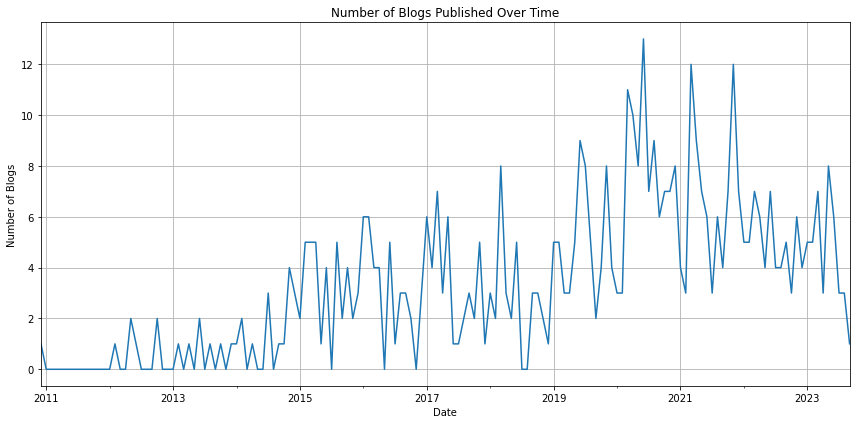

In [4]:
import matplotlib.pyplot as plt

# Group by month and count the number of blogs published in each month
monthly_counts = data.resample('M', on='date').size()

# Plot the publication frequency over time
plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title("Number of Blogs Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Blogs")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
from collections import Counter
import ast

# Convert the string representation of lists in 'keywords' and 'keyphrase' columns to actual lists
data['keywords'] = data['keywords'].apply(ast.literal_eval)
data['keyphrase'] = data['keyphrase'].apply(ast.literal_eval)

# Flatten the lists and count the occurrence of each keyword and keyphrase
keywords_counter = Counter([keyword for sublist in data['keywords'] for keyword in sublist])
keyphrase_counter = Counter([keyphrase for sublist in data['keyphrase'] for keyphrase in sublist])

# Get the top 10 most common keywords and keyphrases
top_keywords = keywords_counter.most_common(10)
top_keyphrases = keyphrase_counter.most_common(10)

top_keywords, top_keyphrases


([('futurice', 56),
  ('innovation', 41),
  ('agile', 32),
  ('mobility', 29),
  ('service', 28),
  ('datum', 23),
  ('organisation', 22),
  ('design', 22),
  ('designer', 22),
  ('business', 21)],
 [('energy sector', 7),
  ('product development', 6),
  ('urban mobility', 6),
  ('design teams', 4),
  ('agile product', 4),
  ('energy companies', 4),
  ('energy industry', 4),
  ('digital healthcare', 4),
  ('new mobility', 4),
  ('mobility landscape', 4)])

In [6]:
# Group by quarter and count the occurrences of each keyphrase in each quarter
quarterly_keyphrase_counts = data.groupby(data['date'].dt.to_period("Q")).apply(lambda x: Counter([keyphrase for sublist in x['keyphrase'] for keyphrase in sublist]))

# Convert the Counter objects to DataFrame for keyphrases
keyphrase_df_quarterly = pd.DataFrame.from_records(quarterly_keyphrase_counts).fillna(0).T


In [7]:
# Compute the sum for each keyphrase across all quarters
quarterly_keyphrase_sum = keyphrase_df_quarterly.sum(axis=1)

# Get the top 10 keyphrases based on their summed counts across quarters
top_quarterly_keyphrases = quarterly_keyphrase_sum.nlargest(10).index

# Filter the DataFrame to get the trends of these top keyphrases over the quarters
top_keyphrase_trends_quarterly = keyphrase_df_quarterly.loc[top_quarterly_keyphrases]

top_keyphrase_trends_quarterly


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
energy sector,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
urban mobility,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0
lean service,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
design teams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
mobility services,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobility landscape,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
new mobility,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
energy industry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
energy companies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


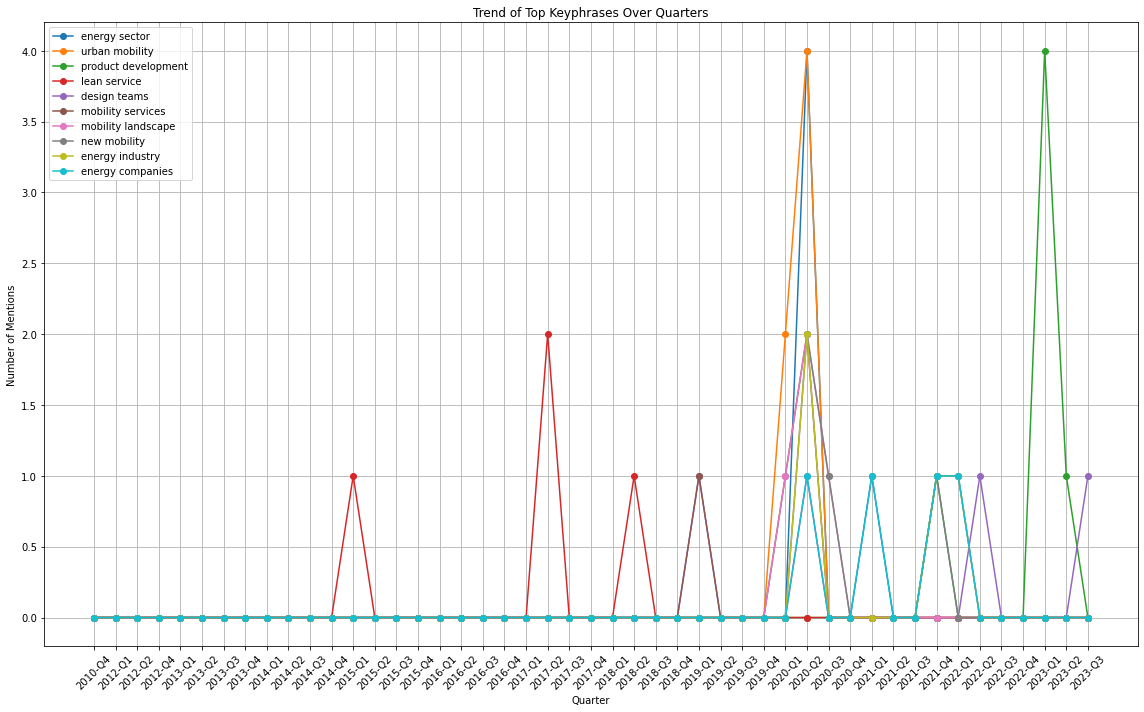

In [8]:
# Get the quarters from the original quarterly aggregated data
quarter_period_index = quarterly_keyphrase_counts.index

# Convert the PeriodIndex to the desired "20XX-QX" format
quarter_labels_final = quarter_period_index.strftime('%Y-Q%q')

# Plotting the trends of the top keyphrases with the final x-axis labels
plt.figure(figsize=(16, 10))

for keyphrase in top_keyphrase_trends_quarterly.index:
    plt.plot(quarter_labels_final, top_keyphrase_trends_quarterly.loc[keyphrase], label=keyphrase, marker='o')

plt.title("Trend of Top Keyphrases Over Quarters")
plt.xlabel("Quarter")
plt.ylabel("Number of Mentions")
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
from IPython.display import display, Markdown

text = """
**Emerging Trends:**

- "Product Development" saw a significant surge in mentions during a recent quarter, indicating an increased focus or a specific event related to this topic.
- "Design Teams" also witnessed a recent spike, which might suggest a renewed emphasis on collaborative design processes or team dynamics.

**Consistent Themes:**

- "Energy Sector" has been a consistent theme across multiple quarters, emphasizing its recurring importance in the content.
- "Energy Industry" and "Energy Companies" follow a similar pattern, reinforcing the significance of energy-related topics.

**Variable Popularity:**

- Keyphrases like "Urban Mobility" and "New Mobility" have fluctuating mentions, indicating these topics might be driven by specific events or shifts in the industry.

**Short-lived Highlights:**

- Some keyphrases, like "Lean Service" and "Mobility Services", have singular spikes but aren't consistently present across quarters. This could mean they were the subject of focus during a particular period but didn't maintain long-term traction.

**Temporal Grouping:**

- Certain keyphrases appear to rise in popularity around the same time. For example, "Energy Sector", "Energy Industry", and "Energy Companies" all see simultaneous spikes. This suggests that broader thematic shifts or events might drive multiple related keyphrases.
"""

display(Markdown(text))



**Emerging Trends:**

- "Product Development" saw a significant surge in mentions during a recent quarter, indicating an increased focus or a specific event related to this topic.
- "Design Teams" also witnessed a recent spike, which might suggest a renewed emphasis on collaborative design processes or team dynamics.

**Consistent Themes:**

- "Energy Sector" has been a consistent theme across multiple quarters, emphasizing its recurring importance in the content.
- "Energy Industry" and "Energy Companies" follow a similar pattern, reinforcing the significance of energy-related topics.

**Variable Popularity:**

- Keyphrases like "Urban Mobility" and "New Mobility" have fluctuating mentions, indicating these topics might be driven by specific events or shifts in the industry.

**Short-lived Highlights:**

- Some keyphrases, like "Lean Service" and "Mobility Services", have singular spikes but aren't consistently present across quarters. This could mean they were the subject of focus during a particular period but didn't maintain long-term traction.

**Temporal Grouping:**

- Certain keyphrases appear to rise in popularity around the same time. For example, "Energy Sector", "Energy Industry", and "Energy Companies" all see simultaneous spikes. This suggests that broader thematic shifts or events might drive multiple related keyphrases.


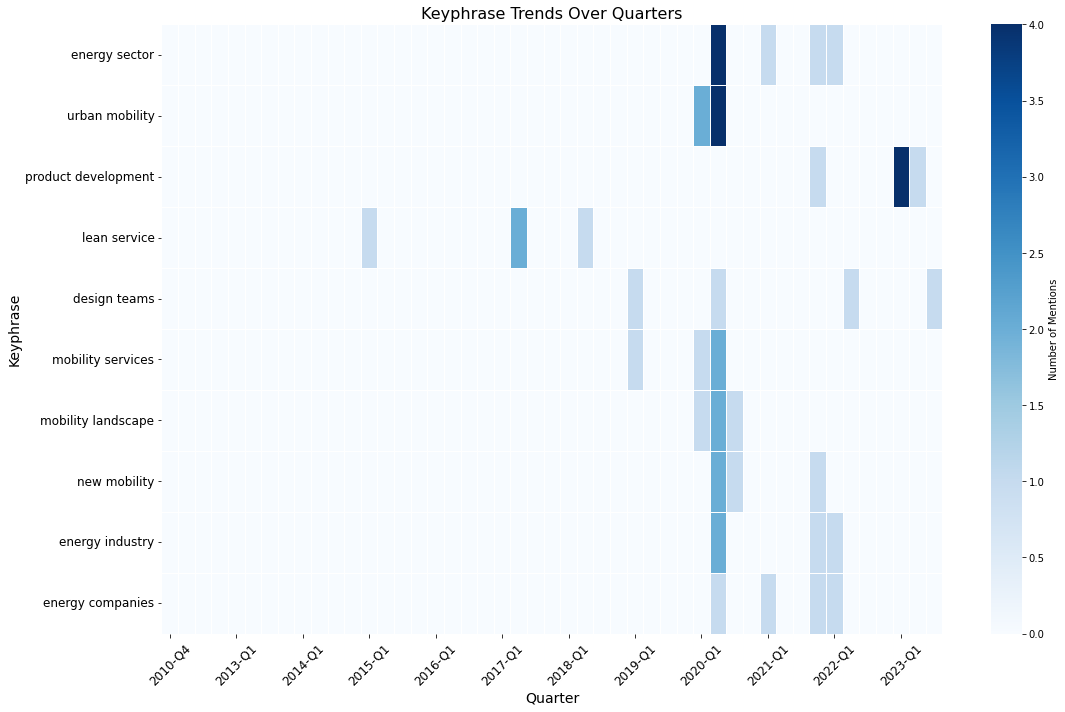

In [10]:
import seaborn as sns
# Reduce the number of x-axis labels by displaying every 4th quarter label for clarity
reduced_xticks = quarter_labels_final[::4]

# Set up the figure and axes
plt.figure(figsize=(16, 10))

# Generate the heatmap without annotations and with reduced x-axis labels
ax = sns.heatmap(top_keyphrase_trends_quarterly, cmap="Blues", linewidths=.5, cbar_kws={'label': 'Number of Mentions'})
ax.set_xticks(ax.get_xticks()[::4])
ax.set_xticklabels(reduced_xticks)

plt.title("Keyphrase Trends Over Quarters", fontsize=16)
plt.xlabel("Quarter", fontsize=14)
plt.ylabel("Keyphrase", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



In [14]:
text = """
**Key Insights:**

1. **Search Engine Optimization (SEO):** Recognizing trending keyphrases can aid in optimizing blog posts for search engines, potentially driving more organic traffic to the blog.
2. **Re-engaging Readers:** By looking at keyphrases that were once popular but aren't anymore, Futurice can revisit those topics with fresh perspectives or updates, potentially re-engaging readers who were previously interested.
3. **Seasonal Interests:** If certain keyphrases or topics trend during specific quarters, it might indicate seasonal interests. Writers can plan their content calendar accordingly.
"""

display(Markdown(text))



**Key Insights:**

1. **Search Engine Optimization (SEO):** Recognizing trending keyphrases can aid in optimizing blog posts for search engines, potentially driving more organic traffic to the blog.
2. **Re-engaging Readers:** By looking at keyphrases that were once popular but aren't anymore, Futurice can revisit those topics with fresh perspectives or updates, potentially re-engaging readers who were previously interested.
3. **Seasonal Interests:** If certain keyphrases or topics trend during specific quarters, it might indicate seasonal interests. Writers can plan their content calendar accordingly.
